# DXT Plots

There are various useful ways to visualize DXT trace data captured using darshan logs.
This notebook demonstrates a few.


In [1]:
### DXT Heatmap Example

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import darshan
report = darshan.DarshanReport("example-logs/example.darshan", read_all=True)  # Default behavior
report = darshan.DarshanReport("example-logs/ior_hdf5_example.darshan", read_all=True)  # Default behavior

In [3]:
%%time
report = darshan.DarshanReport("large-logs/snyder_acme.exe_id1253318_9-27-24239-1515303144625770178_2.darshan", read_all=False)  # Default behavior
report.info()

Filename:       large-logs/snyder_acme.exe_id1253318_9-27-24239-1515303144625770178_2.darshan
Times:          2017-09-27 08:43:59 to 2017-09-27 09:13:01 (Duration 0:29:02)
Executable:    /projects/radix-io/snyder/acme/test_F_case_cetus_dxt/bld/acme.exe 
Processes:      8192
JobID:          1253318
UID:            31074
Modules in Log: ['POSIX', 'MPI-IO', 'PNETCDF', 'BG/Q', 'STDIO', 'DXT_POSIX', 'DXT_MPIIO']
Loaded Records: {}
Name Records:   0
Darshan/Hints:  {'lib_ver': '3.1.4', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139906347601296) (tmp)
CPU times: user 1.04 ms, sys: 41 µs, total: 1.09 ms
Wall time: 748 µs


#### Load some DXT records 

In [4]:
%%time
report.mod_read_all_dxt_records('DXT_POSIX')

CPU times: user 322 ms, sys: 23.8 ms, total: 346 ms
Wall time: 336 ms


In [5]:
%%time
report.mod_read_all_dxt_records('DXT_MPIIO')

CPU times: user 239 ms, sys: 17.9 ms, total: 257 ms
Wall time: 248 ms


In [6]:
report.info()

Filename:       large-logs/snyder_acme.exe_id1253318_9-27-24239-1515303144625770178_2.darshan
Times:          2017-09-27 08:43:59 to 2017-09-27 09:13:01 (Duration 0:29:02)
Executable:    /projects/radix-io/snyder/acme/test_F_case_cetus_dxt/bld/acme.exe 
Processes:      8192
JobID:          1253318
UID:            31074
Modules in Log: ['POSIX', 'MPI-IO', 'PNETCDF', 'BG/Q', 'STDIO', 'DXT_POSIX', 'DXT_MPIIO']
Loaded Records: {'DXT_POSIX': 16745, 'DXT_MPIIO': 1602}
Name Records:   100
Darshan/Hints:  {'lib_ver': '3.1.4', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139906347601296) (tmp)


#### Plot a DXT heatmap

In [7]:
from darshan.experimental.plots import plot_dxt_heatmap

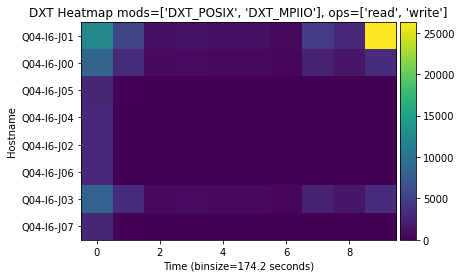

CPU times: user 396 ms, sys: 19.2 ms, total: 415 ms
Wall time: 402 ms


In [8]:
%%time
plot_dxt_heatmap(report, xbins=10, group_by="hostname")
plt.show()

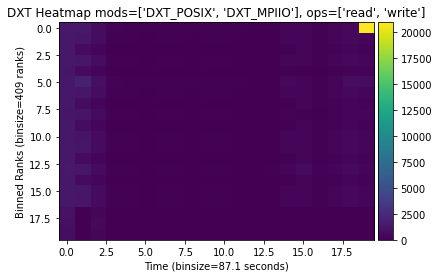

CPU times: user 372 ms, sys: 14 ms, total: 386 ms
Wall time: 376 ms


In [9]:
%%time
p = plot_dxt_heatmap(report, xbins=20, ybins=20)
plt.show()

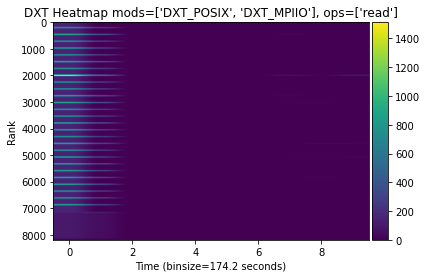

CPU times: user 1.83 s, sys: 40.4 ms, total: 1.87 s
Wall time: 1.83 s


In [11]:
%%time
plot_dxt_heatmap(report, xbins=10, ops=['read'], amplify=50)
plt.show()

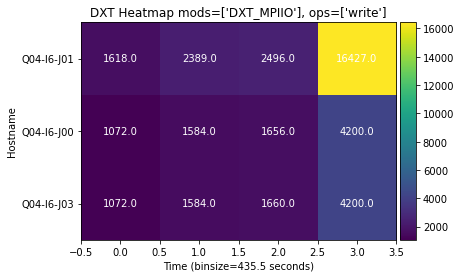

In [31]:
plot_dxt_heatmap(report, xbins=4, group_by="hostname", ops=['write'], mods=['DXT_MPIIO'], display_values=True)
plt.show()

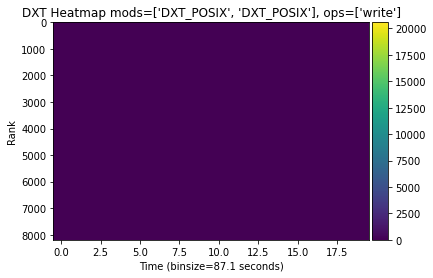

In [32]:
plot_dxt_heatmap(report, xbins=20, ops=['write'], mods=['DXT_POSIX', 'DXT_POSIX'])
plt.show()